In [26]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from  sklearn import ensemble
!

In [63]:
df1=pd.read_csv('train.csv',
               dtype='unicode')
df1=df1.astype('category')

df2=pd.read_csv('test.csv',
               dtype='unicode')
df2=df2.astype('category')
print(len(df2))
df1['corona_result'].replace('other', np.nan, inplace=True); df1= df1.dropna()
df2['corona_result'].replace('other', np.nan, inplace=True); df2= df2.dropna()
print(len(df2))


278848
274956


In [64]:
# df1 = df1[df1['corona_result'].replace('None', np.nan, inplace=True)]
print(len(df1.dropna()))

2151898


In [65]:
df = [df1,df2]
for i in [0,1]:
    print(i)
    df[1]['gender'] = df[1]['gender'].astype(CategoricalDtype(categories=['female', 'male','None'], ordered=True))
    df[1]['age_60_and_above'] = df[1]['age_60_and_above'].astype(CategoricalDtype(categories=['No', 'Yes','None'], ordered=True))
    df[1]['test_indication'] = df[1]['test_indication'].astype(CategoricalDtype(categories=['Abroad', 'Contact with confirmed', 'Other'], ordered=True))
    df[1]['corona_result'] = df[1]['corona_result'].astype(CategoricalDtype(categories=['negative', 'positive', 'other'], ordered=True))


for i in df1.columns:
    df1[i] = df1[i].cat.codes
    df2[i] = df2[i].cat.codes
    

0
1


In [66]:
df1['gender'][df1['gender']==2]= 1
df1['corona_result'][df1['corona_result']==2]= 1

df2['gender'][df2['gender']==2]= 1
df2['corona_result'][df2['corona_result']==2]= 1


C:\Users\kurie\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\kurie\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [67]:
df1.dropna(inplace=True)

X_train = df1[['cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache','gender']].values
X_test = df1['corona_result']

y_train = df2[['cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache','gender']].values
y_test = df2['corona_result']

RF = ensemble.RandomForestClassifier()
RF.fit(X_train,X_test)
y_pred = RF.predict(y_train)

0.4146983754000728 0.9474570476730823 0.5141651597347799 0.3474777649534931


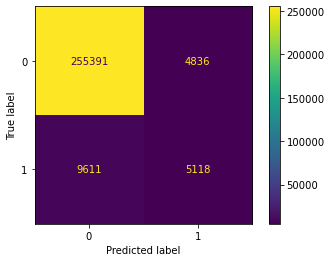

In [68]:
from sklearn import metrics
# testing score
f1 = metrics.f1_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print(f1, accuracy, precision, recall)

metrics.plot_confusion_matrix(RF, y_train, y_test)


In [18]:
len(X)

278848